<a href="https://colab.research.google.com/github/darshan1328/Aerodynamic_Optimization_Using_DeepLearning/blob/main/Aerodynamic_Optimization_using_DeepLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print("Hello World")

Hello World


In [9]:
from google.colab import files
uploaded = files.upload()

Saving cfd_simulated_dataset.csv to cfd_simulated_dataset.csv


In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("cfd_simulated_dataset.csv")
df

,Alpha,Mach,CL,CD,Cp
0,-20.0,0.050000,-0.661725,0.278777,-1.120464
1,-20.0,0.081034,-0.663017,0.278777,-1.122651
2,-20.0,0.112069,-0.664932,0.278777,-1.125894
3,-20.0,0.143103,-0.667486,0.278777,-1.130219
4,-20.0,0.174138,-0.670699,0.278777,-1.135658
...,...,...,...,...,...
895,90.0,0.825862,0.068987,2.248880,-2.257468
896,90.0,0.856897,0.072263,2.264408,-2.331004
897,90.0,0.887931,0.076218,2.274151,-2.401727
898,90.0,0.918966,0.080982,2.277572,-2.464738


In [11]:
df.shape

(900, 5)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Alpha   900 non-null    float64
 1   Mach    900 non-null    float64
 2   CL      900 non-null    float64
 3   CD      900 non-null    float64
 4   Cp      900 non-null    float64
dtypes: float64(5)
memory usage: 35.3 KB


This Plot gives the variation of Coefficient of Lift with Angle of Attack.

Text(0.5, 1.0, 'CL vs Alpha')

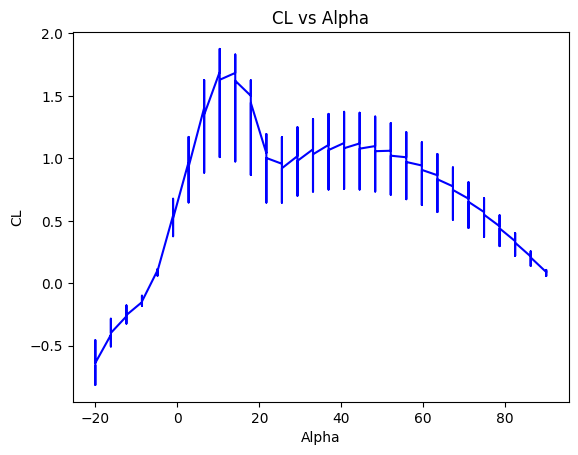

In [17]:
plt.plot(df['Alpha'], df['CL'],color='blue')
plt.xlabel('Alpha')
plt.ylabel('CL')
plt.title('CL vs Alpha')


###  K-Fold Cross-Validation with Neural Network in TensorFlow

This code performs **5-fold cross-validation** using a neural network built with TensorFlow/Keras:

* `KFold(n_splits=5, shuffle=True, random_state=42)` splits the dataset into 5 shuffled folds for robust evaluation.
* For each fold:

  * The model is trained on 4 folds (`X_train`, `Y_train`) and validated on 1 (`X_value`, `Y_value`).
  * A simple feedforward neural network is used:

    * 2 hidden layers with 64 ReLU units each
    * Output layer with 3 units (predicting CL, CD, Cp)
  * The model is trained with the **Adam optimizer** and **mean squared error loss** (`mse`).
  * Validation performance is measured using **Mean Absolute Error** (`mae`).
* Validation MAE for each fold is printed.
* After all folds, you can compute the **average validation MAE** to assess generalization performance.

This approach helps avoid overfitting and provides a more reliable estimate of model accuracy.

In [14]:
from sklearn.model_selection import KFold
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models

In [15]:
X = df[['Alpha', 'Mach']].values
Y = df[['CL', 'CD', 'Cp']].values

In [18]:
from logging import logProcesses
kf = KFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
val_scores = []
for train_index, val_index in kf.split(X):

  X_train, X_value = X[train_index], X[val_index]
  Y_train, Y_value = Y[train_index], Y[val_index]

  model = models.Sequential([
      layers.Dense(64, activation='relu', input_shape=(2,)),
      layers.Dense(64, activation='relu'),
      layers.Dense(3)
  ])

  model.compile(optimizer='adam', loss='mse', metrics=['mae'])

  model.fit(X_train, Y_train, epochs=100, batch_size=16, verbose=0)
  val_mse, val_mae = model.evaluate(X_value, Y_value, verbose=0)
  val_scores.append(val_mae)
  print(f"Fold {fold} - Validation MAE: {val_mae}")
  fold += 1



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 1 - Validation MAE: 0.12063466012477875


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 2 - Validation MAE: 0.12533730268478394


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 3 - Validation MAE: 0.12289483100175858


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 4 - Validation MAE: 0.13945931196212769


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Fold 5 - Validation MAE: 0.09878868609666824


In [19]:
print("MAE per fold:", val_scores)
print("Mean MAE:", np.mean(val_scores))
print("Std MAE:", np.std(val_scores))

MAE per fold: [0.12063466012477875, 0.12533730268478394, 0.12289483100175858, 0.13945931196212769, 0.09878868609666824]
Mean MAE: 0.12142295837402343
Std MAE: 0.013082279975797736


In [21]:
def build_model(n_layers=2, n_neurons=64, optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Input(shape=(2,)))  # Alpha, Mach

    for _ in range(n_layers):
        model.add(layers.Dense(n_neurons, activation='relu'))

    model.add(layers.Dense(3))  # Output: CL, CD, Cp

    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model


In [22]:
final_model = build_model(n_layers=2, n_neurons=64, optimizer='adam')
final_model.fit(X_train, Y_train, epochs=60, batch_size=16, verbose=1)

Epoch 1/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23.0774 - mae: 2.8101
Epoch 2/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1860 - mae: 0.6619
Epoch 3/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9315 - mae: 0.5663
Epoch 4/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9242 - mae: 0.5456
Epoch 5/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8515 - mae: 0.5093
Epoch 6/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6715 - mae: 0.4553
Epoch 7/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6170 - mae: 0.4442
Epoch 8/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3681 - mae: 0.3606
Epoch 9/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3429 - mae: 0.3458
Epoch 10/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2887 - mae: 0.3331
Epoch 11/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2759 - mae: 0.3199
Epoch 12/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2848 - mae: 0.3344
Epoch 13/60
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

In [23]:
model.evaluate(X_value, Y_value)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0137 - mae: 0.0834 


[0.016862541437149048, 0.09878868609666824]

In [24]:
model.predict(np.array([[45, 0.3]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


array([[ 1.0426561,  1.1183479, -1.2594084]], dtype=float32)

Checking the prediction of model with actual data by plotting the results of Cl(Lift Coeffeinct) and Cd (Drag coeffiecient)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


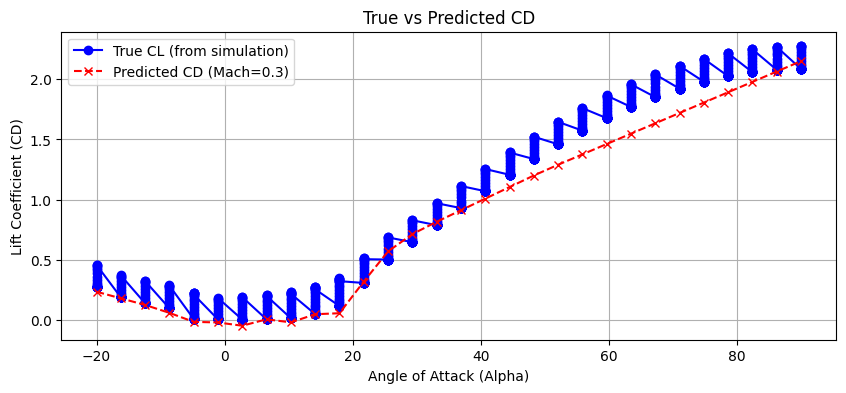

In [25]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 4))
# Plot original data
plt.plot(df['Alpha'], df['CD'], label='True CL (from simulation)', color='blue', linestyle='-', marker='o')

# Generate predictions for same Alpha values at a fixed Mach number, e.g., 0.3
mach_fixed = 0.3
alphas = np.sort(df['Alpha'].unique())
X_pred = np.array([[alpha, mach_fixed] for alpha in alphas])
CL_pred = model.predict(X_pred)[:, 1]  # Only take CD

# Plot predicted CL
plt.plot(alphas, CL_pred, label=f'Predicted CD (Mach={mach_fixed})', color='red', linestyle='--', marker='x')

# Labeling
plt.xlabel('Angle of Attack (Alpha)')
plt.ylabel('Lift Coefficient (CD)')
plt.title('True vs Predicted CD')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


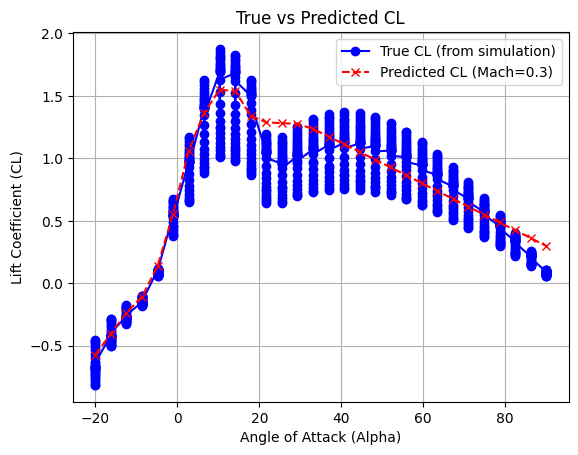

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Plot original data
plt.plot(df['Alpha'], df['CL'], label='True CL (from simulation)', color='blue', linestyle='-', marker='o')

# Generate predictions for same Alpha values at a fixed Mach number, e.g., 0.3
mach_fixed = 0.3
alphas = np.sort(df['Alpha'].unique())
X_pred = np.array([[alpha, mach_fixed] for alpha in alphas])
CL_pred = model.predict(X_pred)[:, 0]  # Only take CL

# Plot predicted CL
plt.plot(alphas, CL_pred, label=f'Predicted CL (Mach={mach_fixed})', color='red', linestyle='--', marker='x')

# Labeling
plt.xlabel('Angle of Attack (Alpha)')
plt.ylabel('Lift Coefficient (CL)')
plt.title('True vs Predicted CL')
plt.legend()
plt.grid(True)
plt.show()



### Function: `get_best_params(angles, velocities)`

This function evaluates aerodynamic performance for different combinations of **angle of attack (`Alpha`)** and **Mach number (`Mach`)** using a trained machine learning model.

#### Key Features:

* **Inputs**:

  * `angles`: List or array of angle of attack values (in degrees).
  * `velocities`: List or array of Mach numbers (must all be < 1).

* **Process**:

  1. Generates all possible combinations of `(Alpha, Mach)` values.
  2. Uses the `model.predict()` function to compute predicted **CL** (lift coefficient) and **CD** (drag coefficient) for each combination.
  3. Calculates the **CL/CD ratio**, a key metric for aerodynamic efficiency.
  4. Returns a **DataFrame** sorted by the highest CL/CD ratio — the most aerodynamically efficient cases are listed at the top.

* **Error Handling**:

  * Raises a `ValueError` if any Mach number is ≥ 1 (to ensure subsonic flow conditions).

#### Output:

A `pandas.DataFrame` with the following columns:

* `Alpha`: Angle of attack
* `Mach`: Mach number
* `CL`: Predicted lift coefficient
* `CD`: Predicted drag coefficient
* `CL/CD`: Efficiency ratio

This function helps identify the best flight conditions (angle + speed) for optimal aerodynamic performance.



In [27]:
import pandas as pd
import numpy as np

def get_best_params(angles, velocities):

    # Ensure inputs are numpy arrays
    angles = np.array(angles)
    velocities = np.array(velocities)

    # Validate Mach numbers
    if np.any(velocities >= 1):
        raise ValueError("All Mach numbers must be less than 1.")

    # Create parameter combinations
    param_grid = np.array([[alpha, mach] for alpha in angles for mach in velocities])

    # Predict using model
    predictions = model.predict(param_grid)
    CL = predictions[:, 0]
    CD = predictions[:, 1]

    # Avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        cl_cd_ratio = np.where(CD != 0, CL / CD, np.nan)

    # Create DataFrame
    result_df = pd.DataFrame(param_grid, columns=['Alpha', 'Mach'])
    result_df['CL'] = CL
    result_df['CD'] = CD
    result_df['CL/CD'] = cl_cd_ratio

    # Sort by highest CL/CD
    result_df = result_df.sort_values(by='CL/CD', ascending=False).reset_index(drop=True)

    return result_df


In [28]:
get_best_params([0, 45, 90], [0.05, 0.3, 0.95])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


,Alpha,Mach,CL,CD,CL/CD
0,0.0,0.95,0.646653,0.038378,16.849627
1,45.0,0.05,1.046983,1.065707,0.982430
2,45.0,0.30,1.042656,1.118348,0.932318
3,45.0,0.95,0.827531,1.248602,0.662766
4,90.0,0.05,0.302462,2.089228,0.144772
5,90.0,0.30,0.298932,2.149568,0.139066
6,90.0,0.95,0.239464,2.344707,0.102130
7,0.0,0.05,0.837716,-0.119989,-6.981602
8,0.0,0.30,0.810574,-0.109015,-7.435467
